<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningPython/blob/main/Tutorial_LiL_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lil_matrix(shape,dtype)

Row-based list of lists sparse matrix

This is a structure for constructing sparse matrices incrementally. Note that inserting a single item can take linear time in the worst case; to construct a matrix efficiently, make sure the items are pre-sorted by index, per row.

In [1]:
import scipy as sp
import numpy as np
from scipy.sparse import lil_matrix
from numpy.random import rand

In [7]:
# alocando espaço de memória para uma matriz 4x5
mtx = lil_matrix((4, 5))

In [4]:
print(type(mtx))

<class 'scipy.sparse.lil.lil_matrix'>


In [8]:
# Como podemos ver ela ainda não contem nenhum valor
print(mtx)

In [9]:
#Criando os dados para colocar na matriz
data = np.round(rand(2, 3))
data

array([[0., 0., 1.],
       [1., 1., 0.]])

In [10]:
#assign the data using fancy indexing
mtx[:2, [1, 2, 3]] = data

In [11]:
# Exibindo a matriz
print(mtx)

  (0, 3)	1.0
  (1, 1)	1.0
  (1, 2)	1.0


In [12]:
mtx.todense()

matrix([[0., 0., 0., 1., 0.],
        [0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [13]:
mtx.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Agora vou tentar resolver novamente o sistema linear, usando agora essa definição de matriz sparsa

https://scipy-lectures.org/advanced/scipy_sparse/lil_matrix.html


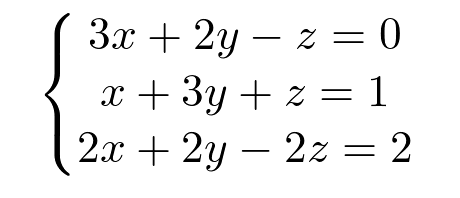

In [14]:
A=lil_matrix((3,3),dtype=np.int64)
print(A)

In [15]:
#Definindo manualmente os elementso 
#Primeira linha
A[0,0]=3
A[0,1]=2
A[0,2]=-1

In [16]:
print(A)

  (0, 0)	3
  (0, 1)	2
  (0, 2)	-1


In [17]:
A.todense()

matrix([[ 3,  2, -1],
        [ 0,  0,  0],
        [ 0,  0,  0]])

In [18]:
#Segunda linha
A[1,0]=1
A[1,1]=3
A[1,2]=1

In [19]:
#Terceira linha
A[2,0]=2
A[2,1]=2
A[2,2]=-2

In [20]:
# b=[0,1,2]
b = np.array([0,1, 2], dtype=np.float32)

In [22]:
from scipy.sparse.linalg import dsolve
x = dsolve.spsolve(A, b, use_umfpack=False)
x

/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


array([-1.,  1., -1.])

In [23]:
from scipy.sparse.linalg import spsolve
x_sparse = spsolve(A,b)
print(x_sparse)

[-1.  1. -1.]


https://scicomp.stackexchange.com/questions/104/libraries-for-solving-sparse-linear-systems

https://scipy-lectures.org/advanced/scipy_sparse/solvers.html


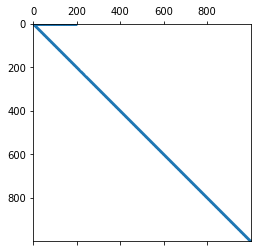

rezidual: 9.52702262440046e-14


In [24]:
"""
Solve a linear system
=======================

Construct a 1000x1000 lil_matrix and add some values to it, convert it
to CSR format and solve A x = b for x:and solve a linear system with a
direct solver.
"""
import numpy as np
import scipy.sparse as sps
from matplotlib import pyplot as plt
from scipy.sparse.linalg.dsolve import linsolve

rand = np.random.rand

mtx = sps.lil_matrix((1000, 1000), dtype=np.float64)
mtx[0, :100] = rand(100)
mtx[1, 100:200] = mtx[0, :100]
mtx.setdiag(rand(1000))

plt.clf()
plt.spy(mtx, marker='.', markersize=2)
plt.show()

mtx = mtx.tocsr()
rhs = rand(1000)

x = linsolve.spsolve(mtx, rhs)

print('rezidual: %r' % np.linalg.norm(mtx * x - rhs))

In [25]:
print(mtx)

  (0, 0)	0.49381408768538393
  (0, 1)	0.6708925268665465
  (0, 2)	0.059342579766703984
  (0, 3)	0.7030235452942698
  (0, 4)	0.5278517900569255
  (0, 5)	0.2898529571281887
  (0, 6)	0.294089696063241
  (0, 7)	0.3176840691887314
  (0, 8)	0.5017978677585962
  (0, 9)	0.015410470922852193
  (0, 10)	0.49664879072977186
  (0, 11)	0.0941644175927071
  (0, 12)	0.8692286604248376
  (0, 13)	0.16573051102362368
  (0, 14)	0.013795629996865899
  (0, 15)	0.3247285541947045
  (0, 16)	0.4009646255323981
  (0, 17)	0.6178126944783549
  (0, 18)	0.529530814609951
  (0, 19)	0.77358812134222
  (0, 20)	0.5931858036669649
  (0, 21)	0.5549101386129537
  (0, 22)	0.16630129610929278
  (0, 23)	0.8785651180852055
  (0, 24)	0.0918139915764099
  :	:
  (975, 975)	0.8248012909713673
  (976, 976)	0.8782918191410864
  (977, 977)	0.7512878390690545
  (978, 978)	0.24189679689771315
  (979, 979)	0.3606172672717024
  (980, 980)	0.9452811858649394
  (981, 981)	0.4862383410645459
  (982, 982)	0.6432598728386646
  (983, 983)	0.5